In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import multiprocessing as mp
import gc
import datetime
from sklearn.preprocessing import LabelEncoder
import calendar
from scipy.sparse import csr_matrix,hstack
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from tqdm import tqdm
import pickle
import sys
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import plotly.graph_objects as go


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
%matplotlib inline
sns.set_style("whitegrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
!cp /content/gdrive/MyDrive/PredictiveAnalyticsData/utility/generate_submission_file.py .

In [5]:
from generate_submission_file import generate_submission

Mounted at /content/gdrive
Training Data Shape: (58327370, 43)
Testing Data Shape: (853720, 43)
Prediction Data Shape: (853720, 43)


In [6]:
def separate_features_and_parameters():
  df = pd.read_pickle("/content/gdrive/MyDrive/PredictiveAnalyticsData/output_data/final_train.pkl")
  # train_df = df.drop(columns=['id'], axis=1)
  train_df = df.copy()
  print(f"Training Data Shape: {train_df.shape}")
  y_train = train_df['sales']
  X_train = train_df.drop(columns=['sales'], axis=1)
  X_train[['id','sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']] = X_train[['id', 'sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']].fillna(0.0)

  df = pd.read_pickle("/content/gdrive/MyDrive/PredictiveAnalyticsData/output_data/final_test.pkl")
  # test_df = df.drop(columns=['id'], axis=1)
  test_df = df.copy()
  print(f"Testing Data Shape: {test_df.shape}")
  y_test = test_df['sales']
  X_test = test_df.drop(columns=['sales'], axis=1)
  X_test[['id','sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']] = X_test[['id', 'sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']].fillna(0.0)

  df = pd.read_pickle("/content/gdrive/MyDrive/PredictiveAnalyticsData/output_data/final_prediction_data.pkl")
  # prediction_df = df.drop(columns=['id'], axis=1)
  prediction_df = df.copy()
  print(f"Prediction Data Shape: {prediction_df.shape}")
  y_prediction = prediction_df['sales']
  X_prediction = prediction_df.drop(columns=['sales'], axis=1)
  X_prediction[['id','sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']] = X_prediction[['id', 'sold_lag_7', 'sold_lag_14', 'sold_lag_21', 'sold_lag_28', 'sold_lag_35', 'sold_lag_42', 'sold_lag_49', 'sold_lag_56', 'roll_mean_7', 'roll_mean_14', 'roll_mean_28']].fillna(0.0)

  del df

  return X_train, y_train, X_test, y_test, X_prediction, y_prediction

In [7]:
X_train, y_train, X_test, y_test, X_prediction, y_prediction = separate_features_and_parameters()

Training Data Shape: (58327370, 43)
Testing Data Shape: (853720, 43)
Prediction Data Shape: (853720, 43)


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_prediction.shape, y_prediction.shape

((58327370, 42), (58327370,), (853720, 42), (853720,), (853720, 42), (853720,))

In [10]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

Ridge()

Here, for alpha = 1, we got below scores:

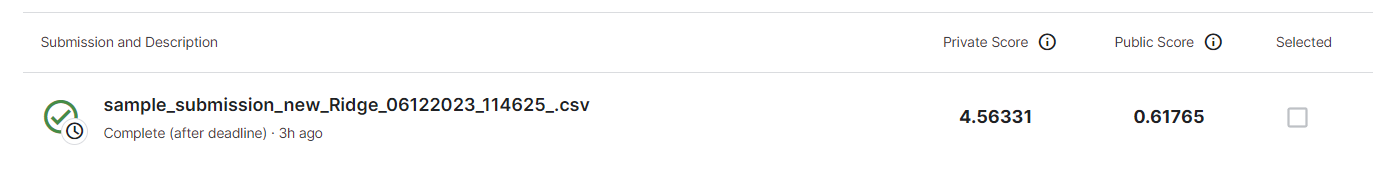

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create a Ridge model
ridge = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Create a Ridge model with the best alpha
model = Ridge(alpha=best_alpha)


In [13]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [15]:

pickle.dump(model, open('/content/gdrive/MyDrive/PredictiveAnalyticsData/trained_models/rr_model_grid_1.pkl.pkl','wb'))

In [18]:
generate_submission('/content/gdrive/MyDrive/PredictiveAnalyticsData/trained_models/rr_model_grid_1.pkl.pkl', take_imp_cols=False)

Generating submission file for model: 
Ridge at location /content/gdrive/MyDrive/PredictiveAnalyticsData/output_data/sample_submission_new_Ridge_06122023_152916_.csv



100%|██████████| 28/28 [00:00<00:00, 471.33it/s]


(60980, 29)


After running gridSerach, we got hyperparameter  **alpha = 100** as best suited.
The result score is:

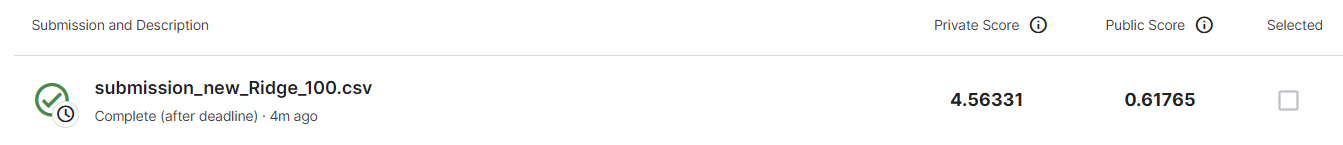